In [1]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
class Iris(object):
    def __init__(self):
        self.W = None
        self.b = 0
    
    def load_data(self, file):
        with open(file,'r') as f:
            return np.array([i.strip().split(',') for i in f.readlines()], dtype=float)   
    
    def one_hot(self, y):
        temp = np.zeros((len(y), len(np.unique(y))))
        for i in range(len(y)):
            temp[i, int(y[i])] = 1.0
        return temp
    
    def create_mini_batch(self, data):
        np.random.shuffle(data)
        return np.split(data, 5)
    
    def hypothesis(self, X):
        f = np.dot(X,self.W) + self.b
        f = np.exp(f)
        denom = f.sum(axis=1)
        for i in range(len(denom)):
            f[i,:] /= denom[i]
        return f
    
    def loss(self, p, y, lamb=0.5):        
        return -1*(np.sum(y*np.log(p))/len(y)) + (lamb/2) * (np.sum(np.square(self.W)))
        
    def gradient(self, X, Y, step_size=0.8):
        p = self.hypothesis(X)
        J = self.loss(p, Y)
        dj_dw = np.dot(X.T, (p - Y)/len(X)) + (step_size * self.W)
        dj_db = sum(p-Y)/len(X)
        return [dj_dw, dj_db]
    
    def train(self, X, Y, step_size=0.04):
#         p = self.hypothesis(X)
#         J = self.loss(p, Y)
        delta_a = self.gradient(X, Y)
        self.W -= step_size * delta_a[0]
        self.b -= step_size * delta_a[1]
        p = self.hypothesis(X)
        correct, total = 0, 0
        for index in range(len(p)):
            if np.argmax(p[index]) == np.argmax(Y[index]):
                correct += 1
            total += 1
        J = self.loss(p, Y)
#         loss_per_epoch.append(J)
        return J, round(correct/total)

    def main(self, epochs=10):
        train_data = self.load_data('iris_train.dat')
        test_data = self.load_data('iris_test.dat')
         
        N,D = train_data[:,:-1].shape
        k = len(np.unique(train_data[:,-1]))
        self.W = np.random.normal(scale=1/D**0.5, size=(D,k))
        self.b = np.random.normal(scale=1/k**0.5, size=k)
        print('W:', self.W)
        print('b:', self.b)
        train_loss = []
        train_accuracy = []
        test_loss = []
        test_accuracy = []
        test_x, test_y = test_data[:,:-1], self.one_hot(test_data[:, -1])
        for count in range(epochs):
            average_loss = 0
            average_accuracy = 0
            batches = self.create_mini_batch(train_data)
            for batch in batches:
                train_x, train_y = batch[:,:-1], self.one_hot(batch[:,-1])
                batch_loss, batch_accuracy = self.train(train_x, train_y)
                average_loss += batch_loss
                average_accuracy += batch_accuracy
            train_loss.append(round(average_loss/len(batches), 2))
            train_accuracy.append(round(average_accuracy/len(batches), 2))
            p = self.hypothesis(test_x)
            test_loss.append(self.loss(p, test_y))
            correct = 0
            total = 0
            for index in range(len(p)):
                if np.argmax(p[index]) == np.argmax(test_y[index]):
                    correct += 1
                total += 1
            test_accuracy.append(round(correct/total, 2))

        %matplotlib notebook
        plt.plot(train_loss, label='Train loss')
        plt.plot(train_accuracy, label='Training accuracy')
        plt.plot(test_loss, label='Test loss')
        plt.plot(test_accuracy, label='Testing accuracy')
        plt.legend(loc='upper right')
        plt.show()
        
        print('Final Test loss:', test_loss[-1])
        print('Final Test accuracy:', test_accuracy[-1])


W: [[ 0.67202195 -0.13901266 -0.23041288]
 [-0.04811263  0.47075613 -0.19953663]
 [ 0.32475723 -0.26841419  0.21364337]
 [-0.32013296 -0.2929785   0.20962369]]
b: [ 0.11396532 -0.40981106 -0.4311265 ]


<IPython.core.display.Javascript object>


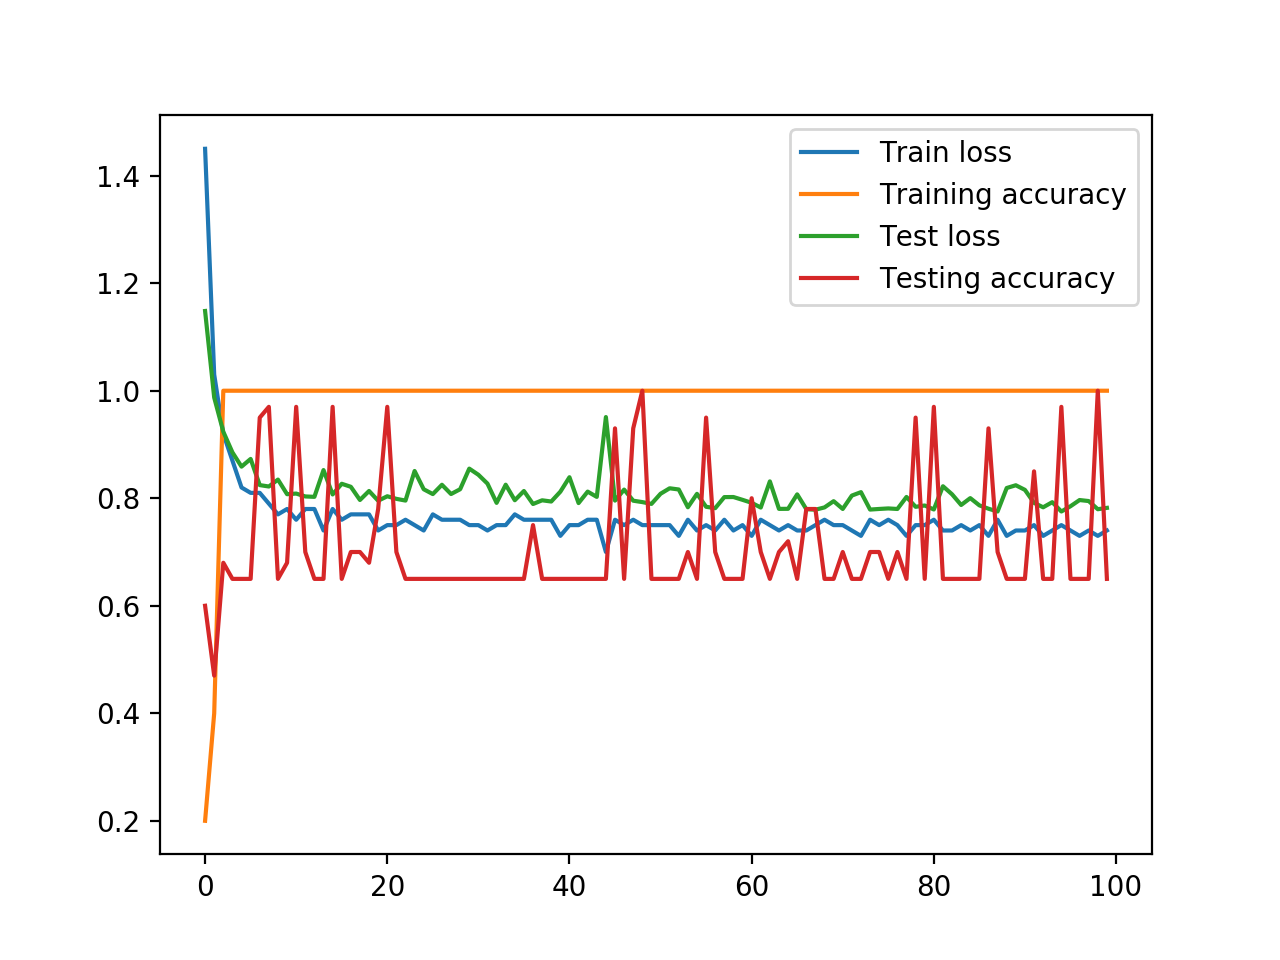

Final Test loss: 0.7820648620181538
Final Test accuracy: 0.65


In [5]:
obj = Iris()
obj.main(epochs=100)

In [14]:
110/5

22.0